In [4]:
import keras
import tensorflow
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Model
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images("C:\Jupyters\envr\Scripts\diabetic_retinopathy\colored_images"))

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2746, 150, 150, 3)
Test images: (916, 150, 150, 3)
Train label: (2746, 5)
Test label: (916, 5)


In [6]:
cnn_model=Sequential()
cnn_model.add(Conv2D(16, (3, 3),activation='relu',input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(32, (3, 3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(64, (3, 3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(5, activation='sigmoid'))
opt = Adam(learning_rate = 1e-4)
cnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [27]:
filepath='best_model__cnn.h5'
cnn_model.fit(x_train,y_train,epochs=50)
cnn_model.save(filepath)

Epoch 1/50
86/86 [==============================] - 23s 247ms/step - loss: 0.3503 - accuracy: 0.6358
Epoch 2/50
86/86 [==============================] - 24s 282ms/step - loss: 0.2739 - accuracy: 0.6970
Epoch 3/50
86/86 [==============================] - 22s 261ms/step - loss: 0.2557 - accuracy: 0.7298
Epoch 4/50
86/86 [==============================] - 27s 320ms/step - loss: 0.2463 - accuracy: 0.7367
Epoch 5/50
86/86 [==============================] - 36s 422ms/step - loss: 0.2337 - accuracy: 0.7458
Epoch 6/50
86/86 [==============================] - 42s 481ms/step - loss: 0.2281 - accuracy: 0.7546
Epoch 7/50
86/86 [==============================] - 42s 495ms/step - loss: 0.2196 - accuracy: 0.7644
Epoch 8/50
86/86 [==============================] - 37s 435ms/step - loss: 0.2101 - accuracy: 0.7637
Epoch 9/50
86/86 [==============================] - 40s 451ms/step - loss: 0.2084 - accuracy: 0.7797
Epoch 10/50
86/86 [==============================] - 36s 423ms/step - loss: 0.1996 - accura

In [28]:
mild = []
No_DR = []
Moderate = []
Severe = []
Proliferate_DR = []

"C:\Jupyters\envr\Scripts\diabetic_retinopathy\colored_images\Mild\0a61bddab956.png"
"C:\Jupyters\envr\Scripts\diabetic_retinopathy\colored_images\Moderate\0c2e2369dfff.png"

mild_labels = []
No_DR_labels = []
Moderate_labels = []
Severe_labels = []
Proliferate_DR_labels = []

for imagePath in imagePaths:
    label = imageP6tath.split(os.path.sep)[-2]
    if(label == 'Mild'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        mild.append(image)
        mild_labels.append(0)
    if(label == 'No_DR'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        No_DR.append(image)
        No_DR_labels.append(2)
    if(label == 'Moderate'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Moderate.append(image)
        Moderate_labels.append(1)
    if(label == 'Severe'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Severe.append(image)
        Severe_labels.append(4)
    if(label == 'Proliferate_DR'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Proliferate_DR.append(image)
        Proliferate_DR_labels.append(3)
    
mild = np.array(mild, dtype="float32")
No_DR = np.array(No_DR, dtype="float32")
Moderate = np.array(Moderate, dtype="float32")
Severe = np.array(Severe, dtype="float32")
Proliferate_DR = np.array(Proliferate_DR, dtype="float32")

In [34]:
from sklearn.metrics import accuracy_score
predIdxs = cnn_model.predict(x_test, batch_size=BS)
CNNScore = accuracy_score(predIdxs.argmax(axis=1),y_test.argmax(axis=1))*100
print(CNNScore)

29/29 [==============================] - 2s 81ms/step
74.235807860262


In [ ]:
print('Mild score is: ' + str(mild_score))
print('No_DR score is: ' + str(No_DR_score))
print('Moderate score is: ' + str(Moderate_score))
print('Severe score is: ' + str(Severe_score))
print('Proliferate_DR score is: ' + str(Proliferate_DR_score))

[INFO] evaluating network...
86/86 [==============================] - 6s 70ms/step

Trainig Accuracy Score:- 98.47050254916242

Testing Accuracy Score:- 77.18340611353712

Traning Graph:- 
 


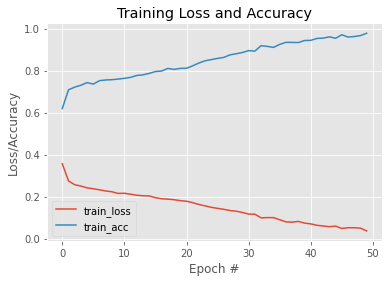

In [8]:
# NETWORK ACCURACY
test_pred = cnn_model.predict(x_test, batch_size=32)
test_pred = np.argmax(test_pred, axis=1)
CNNScore = accuracy_score(test_pred,y_test.argmax(axis=1))*100

In [ ]:
# EXTRACTING FEATURES
extract = Model(cnn_model.inputs, cnn_model.layers[-4].output)
train_cnn_fit  = extract.predict(x_train)
test_cnn_fit = extract.predict(x_test)  

svm = SVC(kernel='linear')
svm.fit(train_cnn_fit,np.argmax(y_train,axis=1))
TestSVMScoreCNN = svm.score(test_cnn_fit,np.argmax(y_test,axis=1))*100

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_cnn_fit,np.argmax(y_train,axis=1))
TestDecisionScoreCNN = clf.score(test_cnn_fit,np.argmax(y_test,axis=1))*100

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_cnn_fit,np.argmax(y_train,axis=1))
TestKNNScoreCNN = knn.score(test_cnn_fit,np.argmax(y_test,axis=1))*100

gnb = GaussianNB()
gnb.fit(train_cnn_fit,np.argmax(y_train,axis=1))
TestNBScoreCNN = gnb.score(test_cnn_fit,np.argmax(y_test,axis=1))*100

In [9]:
extractCNN = Model(cnn_model.inputs, cnn_model.layers[-4].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)
feat_testCNN = extractCNN.predict(x_test)  

print(feat_trainCNN.shape)

29/29 [==============================] - 2s 68ms/step
(2746, 1024)


## SVM

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

SVM Training Accuracy Score:- 99.34450109249818

SVM Testing Accuracy Score:- 74.89082969432314


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)

Decision Tree Training Accuracy Score:- 99.38091769847051

Decision Tree Testing Accuracy Score:- 66.8122270742358


## K-Nearest Neighbor(KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

KNN Training Accuracy Score:- 82.33794610342316

KNN Testing Accuracy Score:- 72.70742358078603


## Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainNBScoreCNN=gnb.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScoreCNN)

TestNBScoreCNN=gnb.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScoreCNN)


GaussianNaive Bayes Training Accuracy Score:- 40.09468317552804

GaussianNaive Bayes Testing Accuracy Score:- 33.51528384279476


In [14]:
print("--Training Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(trainCNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TrainSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TrainDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TrainKNNScoreCNN))
print("CNN-NB Accuracy:- {:.2f} %".format(TrainNBScoreCNN))

print("\n--Testing Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(CNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TestSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TestDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TestKNNScoreCNN))
print("CNN-NB Accuracy:- {:.2f} %".format(TestNBScoreCNN))

--Training Accuracy..
CNN Accuracy:- 98.47 %
CNN-SVM Accuracy:- 99.34 %
CNN-DT Accuracy:- 99.38 %
CNN-KNN Accuracy:- 82.34 %
CNN-NB Accuracy:- 40.09 %

--Testing Accuracy..
CNN Accuracy:- 77.18 %
CNN-SVM Accuracy:- 74.89 %
CNN-DT Accuracy:- 66.81 %
CNN-KNN Accuracy:- 72.71 %
CNN-NB Accuracy:- 33.52 %
